In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import zscore


data = pd.read_excel("Turmas.xlsx") 
student_data = data['Alunos']

mean = np.mean(student_data)
variance = np.var(student_data, ddof=1)
max_value = np.max(student_data)
min_value = np.min(student_data)
median = np.median(student_data)
std = np.std(student_data)
percentile = np.percentile(student_data, [25, 50, 75])
#print (f'Análise:\nMédia:{mean}\nVariancia:{variance}\nValor máximo:{max_value}\nValor mínimo:{min_value}\
#       \nMediana:{median}\nDesvio padrão:{std}\nPercentis:{percentile}')

z_score = (student_data - mean) / std

student_data_df = pd.DataFrame(
    {
        'Notas' : student_data,
        'Z-score' : z_score
    }
)
zscore_scipy = zscore(student_data, ddof=1)
print(z_score, zscore_scipy)

0    -0.881582
1     1.853520
2     1.169744
3    -0.471317
4     1.785142
        ...   
79    0.280836
80   -1.086715
81    0.007326
82    0.280836
83   -1.155092
Name: Alunos, Length: 84, dtype: float64 0    -0.876319
1     1.842454
2     1.162761
3    -0.468503
4     1.774485
        ...   
79    0.279160
80   -1.080227
81    0.007282
82    0.279160
83   -1.148196
Name: Alunos, Length: 84, dtype: float64


Minimo: 1.0
1Q: 4.75,
Mediana: 20.0      
3Q: 28.75
Maximo: 57.0


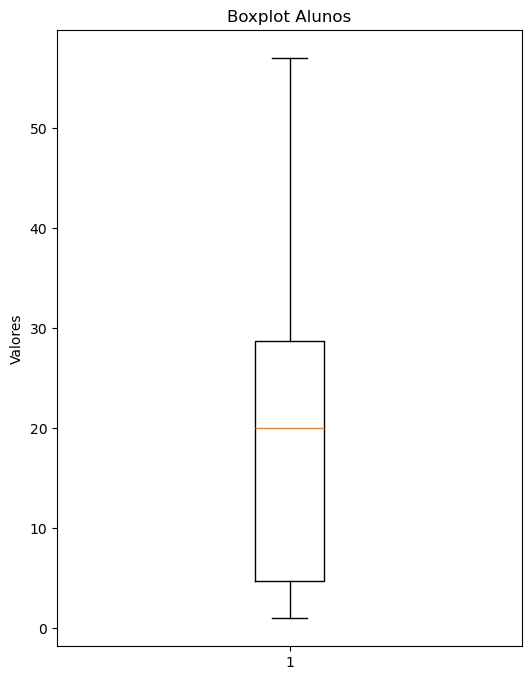

In [68]:
student_data_prctl = np.percentile(student_data, [0, 25, 50, 75, 100])
print(f'Minimo: {student_data_prctl[0]}\n1Q: {student_data_prctl[1]},\nMediana: {student_data_prctl[2]}\
      \n3Q: {student_data_prctl[3]}\nMaximo: {student_data_prctl[4]}')

plt.figure(figsize=(6,8))
plt.boxplot(student_data)
plt.title("Boxplot Alunos")
plt.ylabel("Valores")
plt.savefig('boxplot_alunos')


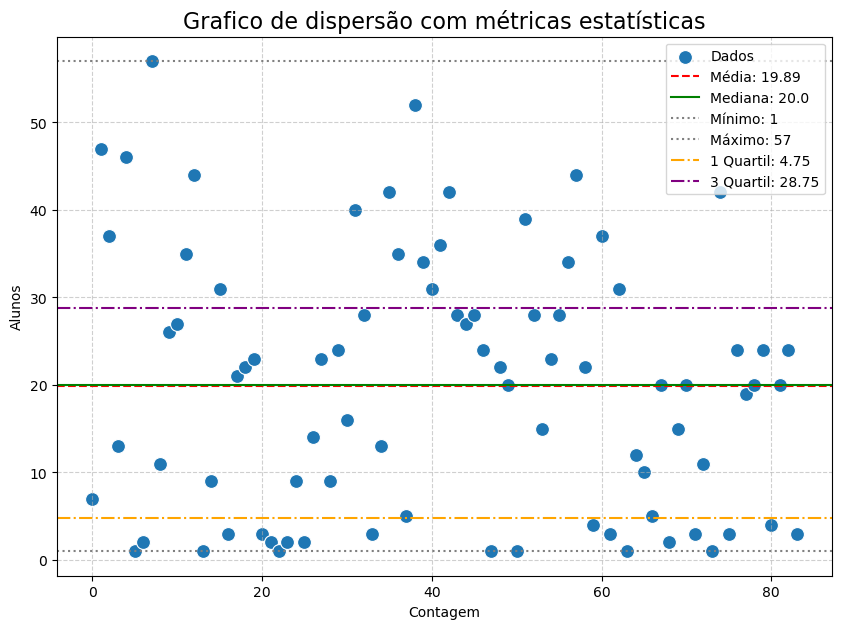

In [ ]:
index = range(len(student_data))

#criando o grafico

plt.figure(figsize=(10, 7))
ax = sns.scatterplot(x=index, y=student_data, s=100, label="Dados")
plt.ylabel('Alunos')
plt.xlabel('Contagem')

ax.axhline(mean, color='red', linestyle='--', label=f'Média: {mean:.2f}')
ax.axhline(median, color='green', linestyle ="-", label=f'Mediana: {median}')
ax.axhline(min_value, color='gray', linestyle=":", label=f'Mínimo: {min_value}')
ax.axhline(max_value, color='gray', linestyle=":", label=f'Máximo: {max_value}')
ax.axhline(percentile[0], color='orange', linestyle="-.", label=f'1 Quartil: {percentile[0]}')
ax.axhline(percentile[2], color='purple', linestyle='-.', label=f'3 Quartil: {percentile[2]}')
ax.set_title('Grafico de dispersão com métricas estatísticas', fontsize=16)
ax.legend()
plt.grid(True, linestyle='--', alpha=0.6)

#plt.savefig('statistic_graph.png')





In [33]:
url = r'https://vincentarelbundock.github.io/Rdatasets/csv/datasets/Nile.csv'

nile_df = pd.read_csv(url)
#print(nile_df.head())
nile_streamflow = nile_df['value']
print('Info da base de dados:')
nile_df.info()

Info da base de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   rownames  100 non-null    int64
 1   time      100 non-null    int64
 2   value     100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


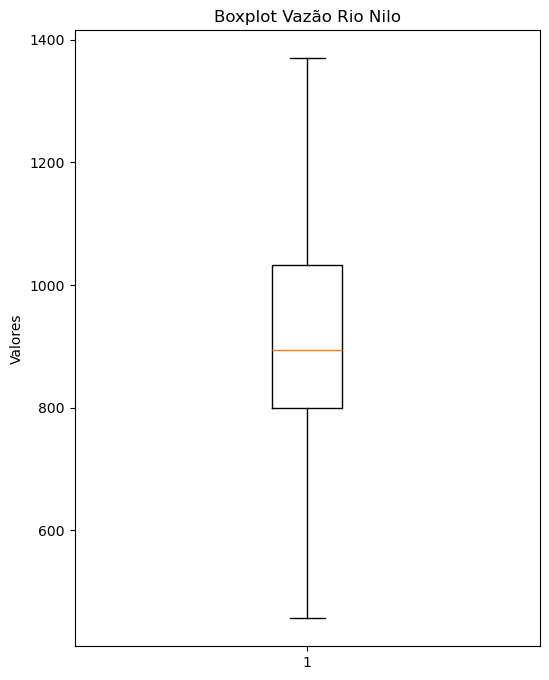

In [73]:
plt.figure(figsize=(6,8))
plt.boxplot(nile_streamflow)
plt.title("Boxplot Vazão Rio Nilo")
plt.ylabel("Valores")
plt.savefig('boxplot_rio_nilo')

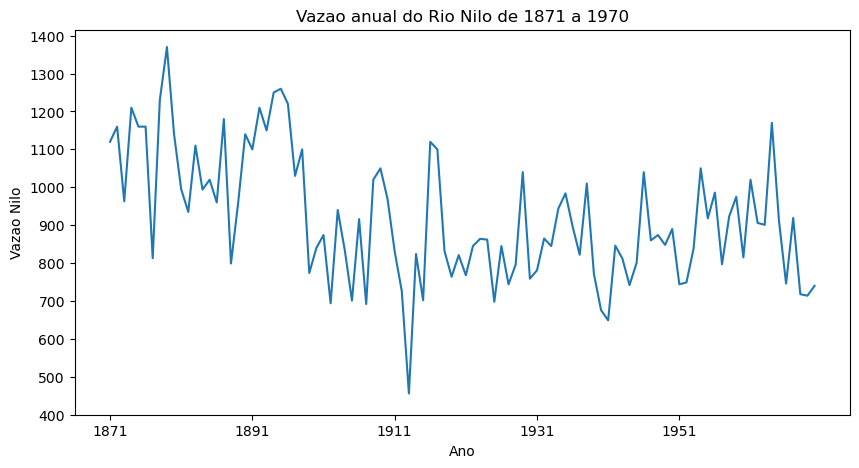

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(nile_df['time'],nile_streamflow)
plt.xticks(np.arange(1871, 1971, 20))
plt.yticks(np.arange(400, 1500, 100))
plt.xlabel("Ano")
plt.ylabel("Vazao Nilo")
plt.title('Vazao anual do Rio Nilo de 1871 a 1970')
plt.savefig('vazao_anual')

In [56]:
print("Análise de outliers")

q1 = nile_streamflow.quantile(0.25)
q3 = nile_streamflow.quantile(0.75)
iqr = q3-q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
nile_streamflow_mean = nile_streamflow.mean

outliers = nile_streamflow[(nile_streamflow < lower_limit) | (nile_streamflow > upper_limit )]
print(f'Limite inferior para outliers:{lower_limit:.2f}\nLimite superior para outliers:{upper_limit:.2f}')


Análise de outliers
Limite inferior para outliers:447.50
Limite superior para outliers:1383.50


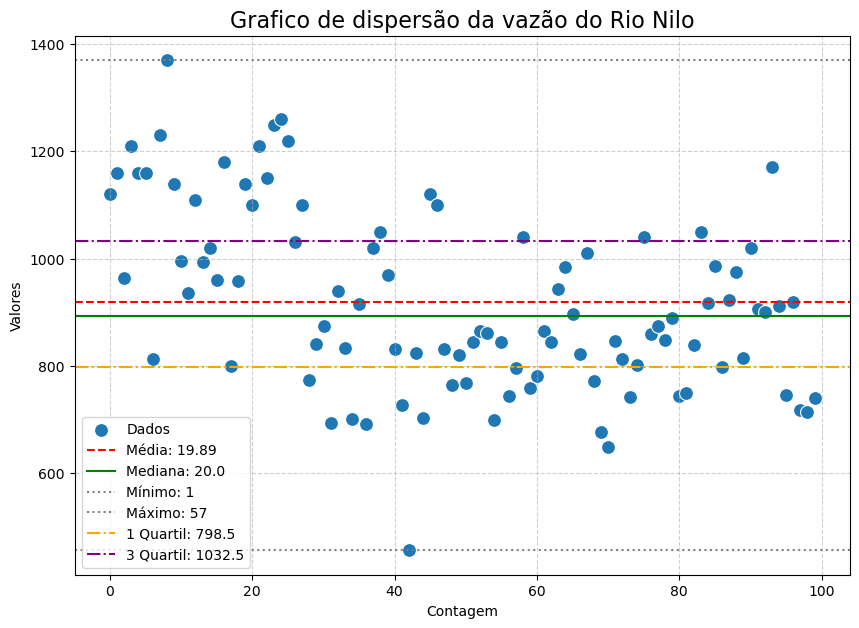

In [76]:
### DIPERSAO RIO NILO

mean_nile_streamflow = np.mean(nile_streamflow)
variance_nile_streamflow = np.var(nile_streamflow, ddof=1)
max_value_nile_streamflow = np.max(nile_streamflow)
min_value_nile_streamflow = np.min(nile_streamflow)
median_nile_streamflow = np.median(nile_streamflow)
std_nile_streamflow = np.std(nile_streamflow)
percentile_nile_streamflow = np.percentile(nile_streamflow, [25, 50, 75])
index_nile_streamflow = range(len(nile_streamflow))

#criando o grafico

plt.figure(figsize=(10, 7))
nile_streamflow_ax = sns.scatterplot(x=index_nile_streamflow, y=nile_streamflow, s=100, label="Dados")
plt.ylabel('Valores')
plt.xlabel('Contagem')

nile_streamflow_ax.axhline(mean_nile_streamflow, color='red', linestyle='--', label=f'Média: {mean:.2f}')
nile_streamflow_ax.axhline(median_nile_streamflow, color='green', linestyle ="-", label=f'Mediana: {median}')
nile_streamflow_ax.axhline(min_value_nile_streamflow, color='gray', linestyle=":", label=f'Mínimo: {min_value}')
nile_streamflow_ax.axhline(max_value_nile_streamflow, color='gray', linestyle=":", label=f'Máximo: {max_value}')
nile_streamflow_ax.axhline(percentile_nile_streamflow[0], color='orange', linestyle="-.", label=f'1 Quartil: {percentile[0]}')
nile_streamflow_ax.axhline(percentile_nile_streamflow[2], color='purple', linestyle='-.', label=f'3 Quartil: {percentile[2]}')
nile_streamflow_ax.set_title('Grafico de dispersão da vazão do Rio Nilo', fontsize=16)
nile_streamflow_ax.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('statistic_graph_nile.png')